In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,\
recall_score,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,f1_score,\
classification_report

# Loading Dataset

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)


In [3]:
df = data.frame

# Splitting data for training and testing and scaling of data

In [4]:
X = df.drop("target",axis=1)
y = df["target"]
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.2)
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

# SVM

In [5]:
svm = SVC(kernel="linear")
svm.fit(x_train_scaled,y_train)
svm

SVC(kernel='linear')

# Weight vectors

In [6]:
svm.coef_

array([[-0.26078317,  0.02847769, -0.16884011, -0.16177195,  0.32318027,
         0.80515642, -0.79468591, -1.13599105, -0.17791552,  0.38019137,
        -1.09693582,  0.41057375, -0.27925927, -0.94069592, -0.20967431,
         0.52437614,  0.24589479, -0.25428297, -0.05594398,  0.70821727,
        -0.60777122, -1.18612211, -0.09376891, -0.58904887, -0.58474363,
        -0.1046407 , -0.71005684, -0.37474987, -0.19814949, -0.88134419]])

# bias

In [7]:
svm.intercept_

array([-0.12280922])

# Support vectors

In [8]:
svm.support_vectors_

array([[ 0.04022692,  0.75759084,  0.07352266, ...,  0.32205054,
        -0.33908368, -0.05263921],
       [ 0.2389982 ,  1.37675913,  0.14462194, ..., -1.30784743,
        -2.13913229, -1.61311339],
       [ 0.34390527,  0.80665701,  0.33180987, ...,  0.49536308,
        -0.56468553, -0.88741342],
       ...,
       [ 0.09544116,  1.32769296,  0.15546759, ...,  0.08336574,
         0.43781286,  0.97726279],
       [ 0.0816376 , -0.64663609,  0.08878692, ...,  0.40110538,
         0.22492097,  0.17373095],
       [-0.17510864,  0.69917874, -0.20203725, ...,  0.20042771,
        -0.06423071, -0.83863147]])

# support indices

In [9]:
svm.support_

array([ 46,  51,  55,  56,  60,  96, 118, 137, 138, 152, 206, 287, 335,
       383, 429, 445,  10,  18,  27,  32,  34,  62,  65, 104, 108, 144,
       183, 256, 273, 300, 318, 334, 353, 355, 387, 444], dtype=int32)

# support vectors per class

In [10]:
svm.n_support_

array([16, 20], dtype=int32)

# Prediction and model accuracy

In [11]:
y_pred = svm.predict(x_test_scaled)
print(f"Accuracy Score {accuracy_score(y_test,y_pred)}")

Accuracy Score 0.9824561403508771


# PCA on training Features

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)


# SVM model trained with PCA

In [13]:
svm_2d = SVC(kernel="linear")
svm_2d.fit(x_train_pca,y_train)
svm_2d

SVC(kernel='linear')

In [14]:
def plot_svm_decision_boundary(model, X, y):
    w = model.coef_[0]
    b = model.intercept_[0]

    # Create grid
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    Z = (w[0]*xx + w[1]*yy + b)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))

    # Data points
    plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red', label='Malignant')
    plt.scatter(X[y==1][:,0], X[y==1][:,1], color='green', label='Benign')

    # Decision boundary
    plt.contour(xx, yy, Z, levels=[0], colors='black')

    # Margin boundaries
    plt.contour(xx, yy, Z, levels=[-1,1], linestyles='--', colors='black')

    # Support vectors
    plt.scatter(
        model.support_vectors_[:,0],
        model.support_vectors_[:,1],
        s=120,
        facecolors='none',
        edgecolors='blue',
        label='Support Vectors'
    )

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Linear SVM with Margin and Support Vectors")
    plt.legend()
    plt.show()


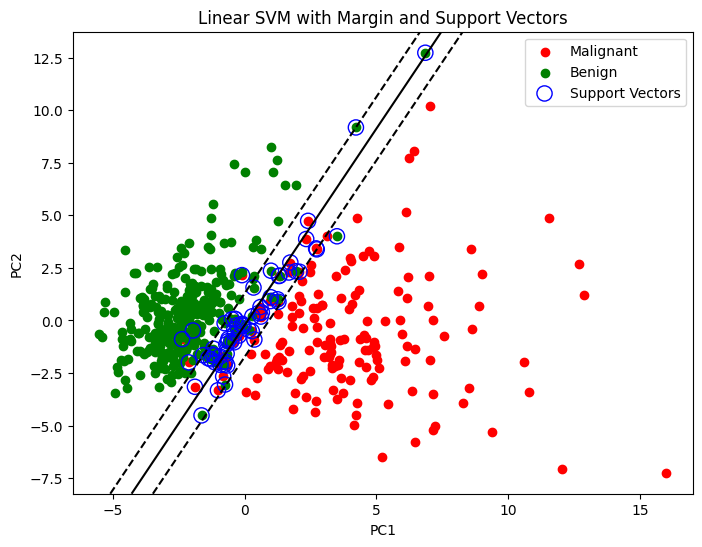

In [15]:
plot_svm_decision_boundary(svm_2d,x_train_pca,y_train)

# Margin width

In [16]:
w_2d = svm_2d.coef_[0]
margin_width = 2 / np.linalg.norm(w_2d)

print("Margin Width:", margin_width)


Margin Width: 1.4257616837612732
